## **Exploring Language Modeling with N-Gram Sizes and Smoothing Techniques**
#### **Step 1: Data Preparation**


In [1]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
 # Load all nessessary libraries
import pandas as pd
import nltk
import string
import re
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
# Data preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize into sentences
    sentences = nltk.sent_tokenize(text)
    # Tokenize each sentence into words
    words = [nltk.word_tokenize(sentence) for sentence in sentences]

 # Flatten tokens from all sentences into one list
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    return words

# Apply preprocessing to the 'review' column
df['preprocessed_review'] = df['review'].apply(preprocess_text)

# Show the result
print(df[['review', 'preprocessed_review']])


                                                  review  \
0      One of the other reviewers has mentioned that ...   
1      A wonderful little production. <br /><br />The...   
2      I thought this was a wonderful way to spend ti...   
3      Basically there's a family where a little boy ...   
4      Petter Mattei's "Love in the Time of Money" is...   
...                                                  ...   
49995  I thought this movie did a down right good job...   
49996  Bad plot, bad dialogue, bad acting, idiotic di...   
49997  I am a Catholic taught in parochial elementary...   
49998  I'm going to have to disagree with the previou...   
49999  No one expects the Star Trek movies to be high...   

                                     preprocessed_review  
0      [one, of, the, other, reviewers, has, mentione...  
1      [a, wonderful, little, production, br, br, the...  
2      [i, thought, this, was, a, wonderful, way, to,...  
3      [basically, theres, a, family, where

I flatten tokens from all sentences into one list to simplify further processing.
 Instead of keeping a list of token lists (one per sentence), flattening combines
 all tokens into a single list. This makes it easier to perform operations like
 frequency counts, or feeding tokens into models that expect a flat list.


#### **Step 2: Implement N-Gram Models**

In [5]:
import heapq
import nltk
from collections import defaultdict

# Function to generate n-grams from a list of tokenized reviews
def generate_ngrams_from_corpus(corpus, n):
    all_ngrams = []
    for tokens in corpus:
        all_ngrams.extend(nltk.ngrams(tokens, n))
    return all_ngrams

# Function to count frequencies of all n-grams
def ngram_frequency_from_corpus(corpus, n):
    ngrams_list = generate_ngrams_from_corpus(corpus, n)
    ngram_freq_dict = defaultdict(int)

    for ngram in ngrams_list:
        ngram_freq_dict[ngram] += 1

    return dict(ngram_freq_dict)

# Assuming you already have tokenized reviews
df['tokens'] = df['review'].apply(lambda x: preprocess_text(str(x)))

tokenized_reviews = df['tokens'].tolist()

for n in range(1, 5):
    freq_dict = ngram_frequency_from_corpus(tokenized_reviews, n)
    top_10_ngrams = heapq.nlargest(10, freq_dict.items(), key=lambda x: x[1])

    print(f"Top 10 {n}-grams Frequency:")
    for ngram, freq in top_10_ngrams:
        print(f"{ngram}: {freq}")
    print()  # blank line for readability

# Loop over n = 1 to 4, get frequencies, and print nicely
#for n in range(1, 5):
    #freq_dict = ngram_frequency_from_corpus(tokenized_reviews, n)
    #print(f"{n}-Grams Frequency:")
    #print(freq_dict)
    #print()


Top 10 1-grams Frequency:
('the',): 663837
('and',): 320662
('a',): 320520
('of',): 288382
('to',): 266774
('is',): 210152
('in',): 184865
('it',): 152901
('i',): 152091
('this',): 149405

Top 10 2-grams Frequency:
('of', 'the'): 77006
('in', 'the'): 50050
('this', 'movie'): 30381
('and', 'the'): 26385
('is', 'a'): 26025
('the', 'film'): 24329
('to', 'the'): 23639
('to', 'be'): 23225
('the', 'movie'): 22436
('this', 'film'): 20955

Top 10 3-grams Frequency:
('one', 'of', 'the'): 9781
('this', 'movie', 'is'): 5193
('this', 'is', 'a'): 4741
('a', 'lot', 'of'): 4676
('of', 'the', 'film'): 4640
('of', 'the', 'movie'): 4031
('some', 'of', 'the'): 3757
('the', 'film', 'is'): 3650
('is', 'one', 'of'): 3540
('this', 'film', 'is'): 3462

Top 10 4-grams Frequency:
('is', 'one', 'of', 'the'): 2224
('the', 'rest', 'of', 'the'): 1999
('one', 'of', 'the', 'most'): 1653
('one', 'of', 'the', 'best'): 1556
('the', 'end', 'of', 'the'): 1401
('this', 'is', 'one', 'of'): 1244
('i', 'have', 'ever', 'seen')

The section of the code that is commented out was originally intended to display the full output. However, due to the very large size of the output, Google Colab was unable to handle it efficiently and only stopped after computing the 1-gram frequency after 10+ miniutes. To manage this, I opted to limit the examples to only the first 10 results for each case in the code. This approach ensures that the code runs smoothly while still demonstrating the key concepts.

In [6]:
import nltk
from collections import defaultdict

# Generate all n-grams
def generate_ngrams_from_corpus(corpus, n):
    all_ngrams = []
    for tokens in corpus:
        all_ngrams.extend(nltk.ngrams(tokens, n))
    return all_ngrams

# Count frequencies of n-grams
def ngram_frequency_from_corpus(corpus, n):
    ngrams_list = generate_ngrams_from_corpus(corpus, n)
    freq_dict = defaultdict(int)
    for ngram in ngrams_list:
        freq_dict[ngram] += 1
    return dict(freq_dict)

# Calculate n-gram probabilities using the formula:
# P(w_n | w_1, ..., w_{n-1}) = C(w_1,...,w_n) / C(w_1,...,w_{n-1})
def ngram_probabilities_from_corpus(corpus, n):
    ngram_freq = ngram_frequency_from_corpus(corpus, n)

    if n == 1:
        total_unigrams = sum(ngram_freq.values())
        return {ngram: count / total_unigrams for ngram, count in ngram_freq.items()}
    else:
        n_minus_1_gram_freq = ngram_frequency_from_corpus(corpus, n-1)
        probs = {}
        for ngram, count in ngram_freq.items():
            prefix = ngram[:-1]  # all but last word
            prefix_count = n_minus_1_gram_freq.get(prefix, 1)  # smoothing to avoid division by zero
            probs[ngram] = count / prefix_count
        return probs

# Example usage

df['tokens'] = df['review'].apply(lambda x: preprocess_text(str(x)))
tokenized_reviews = df['tokens'].tolist()

import heapq

for n in range(1, 5):
    probs = ngram_probabilities_from_corpus(tokenized_reviews, n)
    top_10 = heapq.nlargest(10, probs.items(), key=lambda x: x[1])

    print(f"Top 10 {n}-gram Probabilities:")
    for ngram, prob in top_10:
        print(f"{ngram}: {prob:.4f}")
    print()


Top 10 1-gram Probabilities:
('the',): 0.0577
('and',): 0.0279
('a',): 0.0278
('of',): 0.0250
('to',): 0.0232
('is',): 0.0183
('in',): 0.0161
('it',): 0.0133
('i',): 0.0132
('this',): 0.0130

Top 10 2-gram Probabilities:
('mebr', 'br'): 1.0000
('wordbr', 'br'): 1.0000
('manyaryans', 'muslims'): 1.0000
('awaybr', 'br'): 1.0000
('romanceoz', 'doesnt'): 1.0000
('viewingthats', 'if'): 1.0000
('oldtimebbc', 'fashion'): 1.0000
('polari', 'but'): 1.0000
('halliwells', 'murals'): 1.0000
('lovebr', 'br'): 1.0000

Top 10 3-gram Probabilities:
('1', 'oz', 'episode'): 1.0000
('oz', 'episode', 'youll'): 1.0000
('hooked', 'they', 'are'): 1.0000
('with', 'mebr', 'br'): 1.0000
('unflinching', 'scenes', 'of'): 1.0000
('go', 'trust', 'me'): 1.0000
('or', 'timid', 'this'): 1.0000
('timid', 'this', 'show'): 1.0000
('show', 'pulls', 'no'): 1.0000
('is', 'hardcore', 'in'): 1.0000

Top 10 4-gram Probabilities:
('other', 'reviewers', 'has', 'mentioned'): 1.0000
('reviewers', 'has', 'mentioned', 'that'): 1.000

#### **Step 3: Apply Smoothing Techniques**

In [7]:
import nltk
from collections import defaultdict, Counter
import heapq

# Frequency functions

def generate_ngrams_from_corpus(corpus, n):
    all_ngrams = []
    for tokens in corpus:
        all_ngrams.extend(nltk.ngrams(tokens, n))
    return all_ngrams

def ngram_frequency_from_corpus(corpus, n):
    ngrams_list = generate_ngrams_from_corpus(corpus, n)
    freq_dict = defaultdict(int)
    for ngram in ngrams_list:
        freq_dict[ngram] += 1
    return dict(freq_dict)

# 1. Laplace (Add-One) smoothing

def laplace_smoothing_probs(corpus, n):
    ngram_freq = ngram_frequency_from_corpus(corpus, n)
    vocabulary = set(word for review in corpus for word in review)
    V = len(vocabulary)

    if n == 1:
        total_unigrams = sum(ngram_freq.values())
        probs = {}
        for unigram in vocabulary:
            count = ngram_freq.get((unigram,), 0)
            probs[(unigram,)] = (count + 1) / (total_unigrams + V)
        return probs
    else:
        n_minus_1_gram_freq = ngram_frequency_from_corpus(corpus, n-1)
        probs = {}
        for ngram in ngram_freq:
            prefix = ngram[:-1]
            prefix_count = n_minus_1_gram_freq.get(prefix, 0)
            count = ngram_freq.get(ngram, 0)
            probs[ngram] = (count + 1) / (prefix_count + V)
        return probs

# 2. Good-Turing discounting (simplified)

def good_turing_probs(corpus, n):
    ngram_freq = ngram_frequency_from_corpus(corpus, n)
    freq_of_freq = Counter(ngram_freq.values())  # counts of counts

    N = sum(ngram_freq.values())
    max_count = max(freq_of_freq.keys()) if freq_of_freq else 0

    adjusted_counts = {}
    for ngram, c in ngram_freq.items():
        c_next = c + 1
        N_c = freq_of_freq.get(c, 0)
        N_c_next = freq_of_freq.get(c_next, 0)
        if N_c > 0 and N_c_next > 0:
            c_star = c_next * (N_c_next / N_c)
        else:
            c_star = c
        adjusted_counts[ngram] = c_star

    total_c_star = sum(adjusted_counts.values())
    probs = {ngram: c_star / total_c_star for ngram, c_star in adjusted_counts.items()}

    # Probability mass for unseen n-grams (with count zero)
    N1 = freq_of_freq.get(1, 0)
    unseen_prob = N1 / N if N > 0 else 0
    probs[('UNSEEN',)] = unseen_prob

    return probs

# 3. Kneser-Ney smoothing (bigram version only)

def kneser_ney_bigram_probs(corpus, D=0.75):
    bigram_freq = ngram_frequency_from_corpus(corpus, 2)
    unigram_freq = ngram_frequency_from_corpus(corpus, 1)

    # Calculate continuation counts: number of unique bigrams where w appears as second word
    continuation_counts = defaultdict(int)
    for (w1, w2) in bigram_freq:
        continuation_counts[w2] += 1

    total_unique_bigrams = len(bigram_freq)

    # Calculate lambda normalization for each w1
    lambda_w1 = defaultdict(float)
    for (w1, w2), c in bigram_freq.items():
        unigram_count = unigram_freq.get((w1,), 0)
        if unigram_count > 0:
            lambda_w1[w1] += D / unigram_count

    # Calculate Kneser-Ney probabilities
    probs = {}
    for (w1, w2), c in bigram_freq.items():
        unigram_count = unigram_freq.get((w1,), 0)
        discounted_count = max(c - D, 0)
        lower_order_prob = continuation_counts[w2] / total_unique_bigrams if total_unique_bigrams > 0 else 0
        if unigram_count > 0:
            prob = (discounted_count / unigram_count) + (lambda_w1[w1] * lower_order_prob)
        else:
            prob = lower_order_prob
        probs[(w1, w2)] = prob

    return probs

# Example usage

df['tokens'] = df['review'].apply(lambda x: preprocess_text(str(x)))
tokenized_reviews = df['tokens'].tolist()

print("=== Laplace Smoothing ===")
for n in range(1, 3):  # unigrams and bigrams example
    laplace_probs = laplace_smoothing_probs(tokenized_reviews, n)
    top_10 = heapq.nlargest(10, laplace_probs.items(), key=lambda x: x[1])
    print(f"Top 10 {n}-grams with Laplace smoothing:")
    for ngram, prob in top_10:
        print(f"{ngram}: {prob:.4f}")
    print()

print("=== Good-Turing Discounting ===")
for n in range(1, 3):
    gt_probs = good_turing_probs(tokenized_reviews, n)
    top_10 = heapq.nlargest(10, gt_probs.items(), key=lambda x: x[1])
    print(f"Top 10 {n}-grams with Good-Turing discounting:")
    for ngram, prob in top_10:
        print(f"{ngram}: {prob:.4f}")
    print()

print("=== Kneser-Ney Smoothing (bigrams only) ===")
kn_probs = kneser_ney_bigram_probs(tokenized_reviews)
top_10 = heapq.nlargest(10, kn_probs.items(), key=lambda x: x[1])
print("Top 10 bigrams with Kneser-Ney smoothing:")
for ngram, prob in top_10:
    print(f"{ngram}: {prob:.4f}")



=== Laplace Smoothing ===
Top 10 1-grams with Laplace smoothing:
('the',): 0.0568
('and',): 0.0274
('a',): 0.0274
('of',): 0.0247
('to',): 0.0228
('is',): 0.0180
('in',): 0.0158
('it',): 0.0131
('i',): 0.0130
('this',): 0.0128

Top 10 2-grams with Laplace smoothing:
('of', 'the'): 0.1640
('in', 'the'): 0.1368
('this', 'movie'): 0.0919
('on', 'the'): 0.0720
('one', 'of'): 0.0696
('is', 'a'): 0.0665
('this', 'film'): 0.0634
('at', 'the'): 0.0597
('for', 'the'): 0.0593
('with', 'the'): 0.0586

=== Good-Turing Discounting ===
Top 10 1-grams with Good-Turing discounting:
('the',): 0.0582
('and',): 0.0281
('a',): 0.0281
('of',): 0.0253
('to',): 0.0234
('is',): 0.0184
('in',): 0.0162
('it',): 0.0134
('i',): 0.0133
('this',): 0.0131

Top 10 2-grams with Good-Turing discounting:
('UNSEEN',): 0.1541
('of', 'the'): 0.0079
('in', 'the'): 0.0052
('this', 'movie'): 0.0031
('and', 'the'): 0.0027
('is', 'a'): 0.0027
('the', 'film'): 0.0025
('to', 'the'): 0.0024
('to', 'be'): 0.0024
('the', 'movie'): 0

#### **Step 4: Evaluate Model Performance**

In [8]:
import math

# Perplexity Calculation
def calculate_perplexity(test_corpus, probs, n, smoothing_type="laplace"):
    N = sum(len(tokens) for tokens in test_corpus)
    log_prob_sum = 0
    unseen_prob = probs.get(('UNSEEN',), 1e-8)  # For Good-Turing

    for tokens in test_corpus:
        ngrams = list(nltk.ngrams(tokens, n)) if len(tokens) >= n else []
        for ngram in ngrams:
            prob = probs.get(ngram, 0)
            if prob == 0:
                if smoothing_type == "laplace":
                    prob = 1e-8
                elif smoothing_type == "good_turing":
                    prob = unseen_prob
                else:
                    prob = 1e-8
            log_prob_sum += math.log(prob)

    avg_log_prob = log_prob_sum / N if N > 0 else float('-inf')
    perplexity = math.exp(-avg_log_prob)
    return perplexity

from sklearn.model_selection import KFold
import numpy as np

# Cross Validation Perplexity
def cross_validate_perplexity(corpus, n, smoothing_func, smoothing_type, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    perplexities = []

    corpus_array = np.array(corpus, dtype=object)

    for train_index, test_index in kf.split(corpus_array):
        train_data = corpus_array[train_index].tolist()
        test_data = corpus_array[test_index].tolist()

        probs = smoothing_func(train_data, n)
        perp = calculate_perplexity(test_data, probs, n, smoothing_type=smoothing_type)
        perplexities.append(perp)

    avg_perplexity = np.mean(perplexities)
    return avg_perplexity

print("=== Cross-Validation Perplexity Comparison ===")
for n in [1, 2]:
    laplace_perp = cross_validate_perplexity(tokenized_reviews, n, laplace_smoothing_probs, "laplace")
    gt_perp = cross_validate_perplexity(tokenized_reviews, n, good_turing_probs, "good_turing")

    print(f"{n}-gram Laplace Perplexity: {laplace_perp:.4f}")
    print(f"{n}-gram Good-Turing Perplexity: {gt_perp:.4f}")

kn_perp = cross_validate_perplexity(tokenized_reviews, 2, kneser_ney_bigram_probs, "kneser_ney")
print(f"Bigram Kneser-Ney Perplexity: {kn_perp:.4f}")


=== Cross-Validation Perplexity Comparison ===
1-gram Laplace Perplexity: 1311.9206
1-gram Good-Turing Perplexity: 1158.9187
2-gram Laplace Perplexity: 11033.6702
2-gram Good-Turing Perplexity: 15809.6102
Bigram Kneser-Ney Perplexity: 1378.5364


**In this code:**

- **Perplexity** quantifies how “surprised” the model is by the test data:

  - Lower perplexity means the model better predicts the test data distribution.

- **Cross-validation** provides a robust estimate of model performance by testing on multiple splits of the data, avoiding overfitting.

- Comparing different smoothing methods (Laplace, Good-Turing, Kneser-Ney) helps identify which method best smooths probabilities and improves model generalization.



#### **Step 5: Visualization and Analysis**

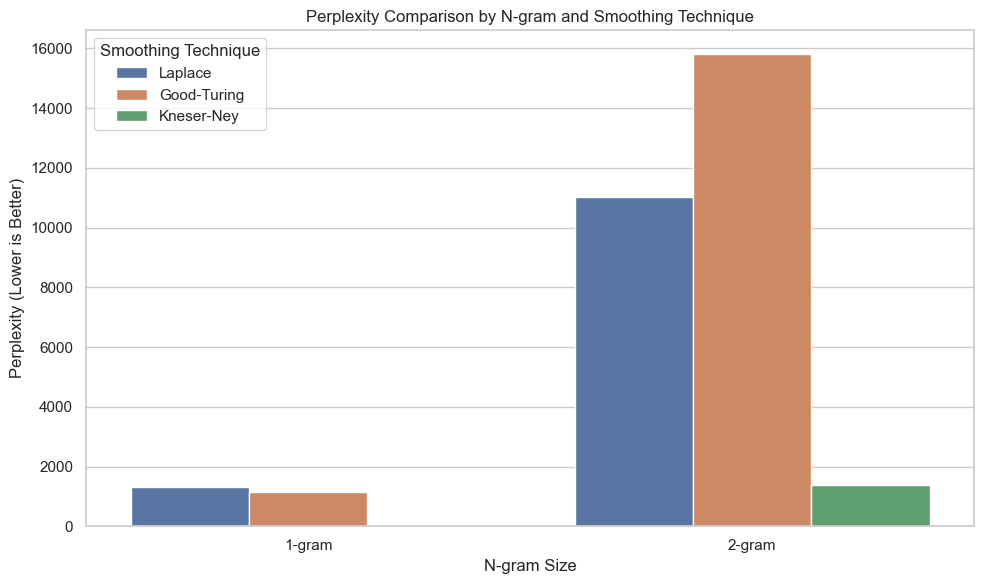

In [9]:
# Store perplexity results
perplexity_results = {
    "n-gram": [],
    "Technique": [],
    "Perplexity": []
}

for n in [1, 2]:
    laplace_perp = cross_validate_perplexity(tokenized_reviews, n, laplace_smoothing_probs, "laplace")
    gt_perp = cross_validate_perplexity(tokenized_reviews, n, good_turing_probs, "good_turing")

    perplexity_results["n-gram"].extend([f"{n}-gram", f"{n}-gram"])
    perplexity_results["Technique"].extend(["Laplace", "Good-Turing"])
    perplexity_results["Perplexity"].extend([laplace_perp, gt_perp])

# Add Kneser-Ney bigram
kn_perp = cross_validate_perplexity(tokenized_reviews, 2, kneser_ney_bigram_probs, "kneser_ney")
perplexity_results["n-gram"].append("2-gram")
perplexity_results["Technique"].append("Kneser-Ney")
perplexity_results["Perplexity"].append(kn_perp)


# Plot with Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create DataFrame from results
df_perplexity = pd.DataFrame(perplexity_results)

# Set plot style
sns.set(style="whitegrid")

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="n-gram", y="Perplexity", hue="Technique", data=df_perplexity)

# Customize the plot
plt.title("Perplexity Comparison by N-gram and Smoothing Technique")
plt.ylabel("Perplexity (Lower is Better)")
plt.xlabel("N-gram Size")
plt.legend(title="Smoothing Technique")
plt.tight_layout()
plt.show()


**X-axis:**

The X-axis represents different language models, each combining an n-gram size (either 1-gram or 2-gram) with a smoothing technique.

**Y-axis:**

The Y-axis represents perplexity scores, which measure how well a language model predicts a sequence of words.

- Lower values on the Y-axis indicate better model performance, as the model is less "confused" when predicting words.

- Higher perplexity indicates worse performance, often due to poor handling of rare or unseen word sequences.

**Unigram Model with Laplace and Good-Turing Smoothing**

In the unigram models, Good-Turing smoothing performed better with a perplexity of 1158.92, compared to Laplace’s 1311.92. This shows that Good-Turing more effectively distributes probability to unseen words, which is critical in real-world text where many low-frequency words occur. However, a major limitation of the unigram model is that it completely ignores word order and context. Every word is treated independently, which significantly reduces its ability to capture grammatical structure or meaning in a sequence. Therefore, while good for baseline comparisons or small datasets, unigram models are unsuitable for tasks that require contextual understanding.

**Bigram Model with Laplace and Good-Turing Smoothing**

The bigram models with Laplace (11033.67) and Good-Turing (15809.61) smoothing exhibited very high perplexity, suggesting poor performance. These results reflect the challenge of data sparsity in bigram models, where many possible word pairs never occur in the training set. While Laplace and Good-Turing try to assign probabilities to unseen bigrams, they are not well-suited to higher-order n-grams because they over-penalize frequent n-grams and spread probabilities too thinly across unlikely combinations. A key limitation here is that these smoothing methods do not effectively model the true distribution of word sequences in natural language when vocabulary is large or data is limited.

**Bigram Model with Kneser-Ney Smoothing**

The bigram model with Kneser-Ney smoothing had a much lower perplexity of 1378.54, outperforming the other bigram models significantly. Kneser-Ney excels in modeling continuation probabilities, helping it assign more realistic probabilities to rare bigrams that contain common continuation words. This allows it to maintain lower perplexity despite the added complexity of bigram modeling. Its main limitation, however, is computational complexity—Kneser-Ney is more difficult to implement and requires more memory and computation than simpler methods. Additionally, its effectiveness relies heavily on having sufficient training data to estimate continuation probabilities accurately.

**Trade-offs Between Model Complexity and Performance**

The results illustrate a clear trade-off between model complexity and performance. The unigram model with Good-Turing smoothing is computationally simple and yields the best perplexity overall, but it fails to capture any word-to-word dependencies. On the other hand, the bigram model with Kneser-Ney smoothing adds a layer of complexity by incorporating context, and although its perplexity is slightly higher, it offers better linguistic modeling capabilities.

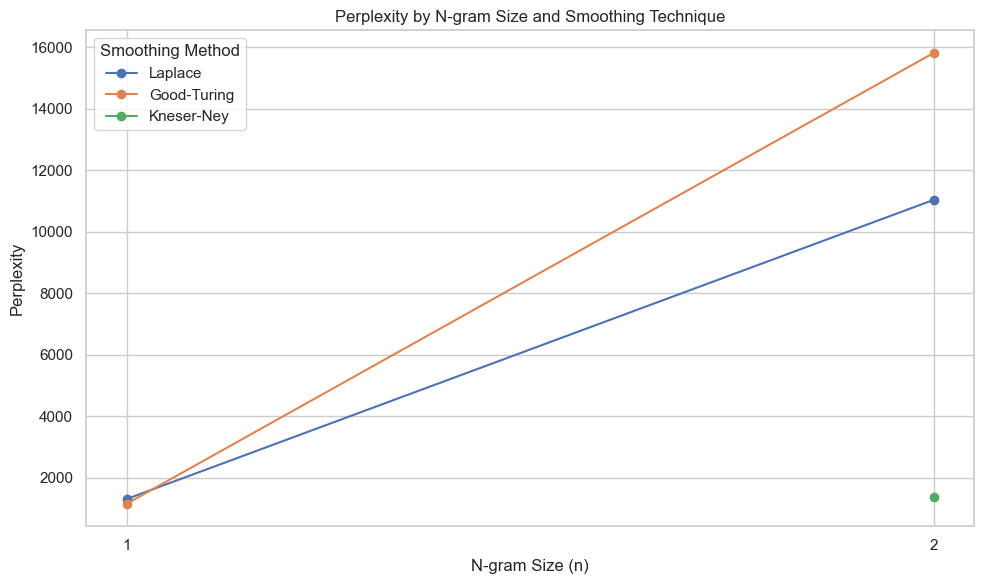

In [10]:
import matplotlib.pyplot as plt

# Sample perplexity results from the project
perplexity_results = {
    '1-gram': {
        'Laplace': 1311.9206,
        'Good-Turing': 1158.9187
    },
    '2-gram': {
        'Laplace': 11033.6702,
        'Good-Turing': 15809.6102,
        'Kneser-Ney': 1378.5364
    }
}

# Prepare data for plotting
ngram_sizes = sorted(set(k.split('-')[0] for k in perplexity_results))
smoothing_methods = ['Laplace', 'Good-Turing', 'Kneser-Ney']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each smoothing method across n-gram sizes
for method in smoothing_methods:
    y = []
    x = []
    for ngram in ngram_sizes:
        key = f"{ngram}-gram"
        if method in perplexity_results.get(key, {}):
            y.append(perplexity_results[key][method])
            x.append(int(ngram))
    if x and y:
        plt.plot(x, y, marker='o', label=method)

# Add plot details
plt.title("Perplexity by N-gram Size and Smoothing Technique")
plt.xlabel("N-gram Size (n)")
plt.ylabel("Perplexity")
plt.xticks([1, 2])
plt.legend(title="Smoothing Method")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


To enhance clarity and illustrate trends more effectively, I have provided a line plot alongside the bar chart to offer a better visualization of how perplexity varies across different n-gram sizes and smoothing techniques.

Number of reviews: 50000
Average review length (in tokens): 230.27
Total tokens: 11513321
Vocabulary size: 181061


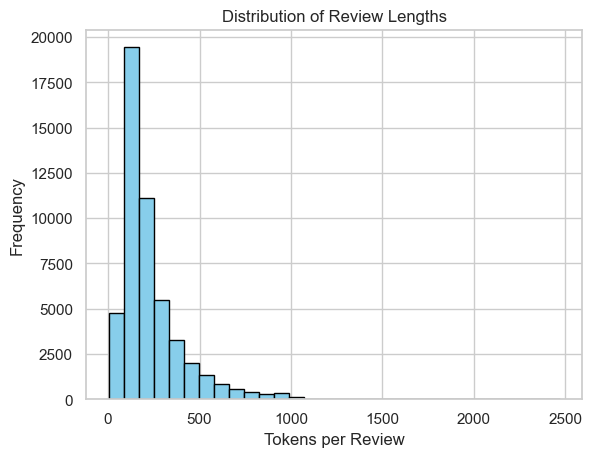

In [11]:
# Summary stats
print(f"Number of reviews: {len(df)}")
review_lengths = [len(tokens) for tokens in tokenized_reviews]
print(f"Average review length (in tokens): {sum(review_lengths)/len(review_lengths):.2f}")
total_tokens = sum(review_lengths)
print(f"Total tokens: {total_tokens}")
vocab = set(word for review in tokenized_reviews for word in review)
print(f"Vocabulary size: {len(vocab)}")
import matplotlib.pyplot as plt

plt.hist(review_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Tokens per Review')
plt.ylabel('Frequency')
plt.show()